In [197]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
import datetime


In [198]:
## Create a function to call the data from MTA URL based on the specified week numbers as input

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190914,190921,190928,191005,191012,191019,191026,191102,191109,191116,191123,191130]


mtap = get_data(week_nums)

In [199]:
#mtap.head()

In [200]:
mtap.shape # quick info on the data array

(2471446, 11)

In [201]:
mtap.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [202]:
mtap.columns = [column.strip() for column in mtap.columns]
mtap.columns
#to remove the space in columns 

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [203]:
mtap.DATE.value_counts().sort_index()

09/07/2019    29225
09/08/2019    29356
09/09/2019    29394
09/10/2019    29552
09/11/2019    29476
              ...  
11/25/2019    29962
11/26/2019    29235
11/27/2019    29655
11/28/2019    29265
11/29/2019    29156
Name: DATE, Length: 84, dtype: int64

In [204]:
mtap.DATE.dtypes

dtype('O')

In [205]:
# combine date and time for a new column named (DATE_TIME) with datetime format. That will ease further grouping and manipulation 
mtap["DATE_TIME"] = pd.to_datetime(mtap.DATE + " " + mtap.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [206]:
mtap.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00


In [207]:
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col= True))
    return pd.concat(dfs)
        
week_nums = [190914,190921,190928,191005,191012,191019,191026,191102,191109,191116,191123,191130]
mtap_2 = get_data_parse_dt(week_nums)
mtap_2.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-09-07 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566
1,2019-09-07 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574
2,2019-09-07 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603
3,2019-09-07 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676
4,2019-09-07 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725


In [208]:
print('Descriptions of entries:')
print(mtap['ENTRIES'].describe())
print('')
print('Descriptions of exits:')
print(mtap['EXITS'].describe())

Descriptions of entries:
count    2.471446e+06
mean     4.162529e+07
std      2.138568e+08
min      0.000000e+00
25%      2.998918e+05
50%      2.001598e+06
75%      6.634805e+06
max      2.129109e+09
Name: ENTRIES, dtype: float64

Descriptions of exits:
count    2.471446e+06
mean     3.431326e+07
std      1.972576e+08
min      0.000000e+00
25%      1.374730e+05
50%      1.165961e+06
75%      4.537504e+06
max      2.123791e+09
Name: EXITS, dtype: float64


In [209]:
# Sorting the data based on Turnstlie (C/A", "UNIT", "SCP", "STATION")

mta_sorted = mtap.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(["C/A", "UNIT", "SCP", "STATION"])

#since entries and exits are cumulative, we need to find the difference between each time interval.
#creating new columns for both entries and exits
mta_sorted['entries_diff'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

mta_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0


In [210]:
print('Descriptions of entries_diff:')
print(mta_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(mta_sorted['exits_diff'].describe())

# notice the negative values in entries and exits 

Descriptions of entries_diff:
count    2.466522e+06
mean    -1.325853e+02
std      3.558084e+06
min     -2.025847e+09
25%      9.000000e+00
50%      7.100000e+01
75%      2.360000e+02
max      2.037956e+09
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    2.466522e+06
mean    -1.038261e+03
std      1.930707e+06
min     -1.907466e+09
25%      8.000000e+00
50%      5.200000e+01
75%      1.680000e+02
max      1.019396e+09
Name: exits_diff, dtype: float64


In [211]:
print('Number of negative entries_diff: %d' %len(mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0]))
print('Number of negative exits_diff: %d' %len(mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0]))
print('Number of unqiue C/A: %d' %len(mta_sorted["C/A"].unique()))
print('Number of unqiue UNIT: %d' %len(mta_sorted["UNIT"].unique()))
print('Number of unqiue SCP: %d' %len(mta_sorted["SCP"].unique()))
print('Number of unqiue STATIONS: %d' %len(mta_sorted["STATION"].unique()))
print('Number of NaN rows: %d' %len(mta_sorted[mta_sorted['entries_diff'].isnull()]))

Number of negative entries_diff: 22066
Number of negative exits_diff: 16977
Number of unqiue C/A: 747
Number of unqiue UNIT: 469
Number of unqiue SCP: 225
Number of unqiue STATIONS: 378
Number of NaN rows: 4924


In [212]:
# fill NaN with ZEROS
mta_sorted['entries_diff'] = mta_sorted['entries_diff'].fillna(0)
mta_sorted['exits_diff'] = mta_sorted['exits_diff'].fillna(0)
mta_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0


In [213]:
print('Number of NaN rows: %d' %len(mta_sorted[mta_sorted['entries_diff'].isnull()])) # Check No. of NaN rows

Number of NaN rows: 0


In [214]:
mask = (mta_sorted['entries_diff'] >= 0) & (mta_sorted['exits_diff']>= 0)&(mta_sorted['entries_diff'] <= 3000)&(mta_sorted['exits_diff'] <= 3000)
# assuming that maximum 3000 passes through each turn turnstile
# removing the negative valuse of enntries and exits
mta_sorted = mta_sorted[mask] 
mta_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0


In [215]:
print('Descriptions of entries_diff:')
print(mta_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(mta_sorted['exits_diff'].describe())
# issues solved now 

Descriptions of entries_diff:
count    2.441614e+06
mean     1.745953e+02
std      2.559001e+02
min      0.000000e+00
25%      9.000000e+00
50%      7.200000e+01
75%      2.370000e+02
max      2.999000e+03
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    2.441614e+06
mean     1.397078e+02
std      2.336674e+02
min      0.000000e+00
25%      8.000000e+00
50%      5.300000e+01
75%      1.690000e+02
max      3.000000e+03
Name: exits_diff, dtype: float64


In [216]:
print('Number of negative entries_diff: %d' %len(mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0]))
print('Number of negative exits_diff: %d' %len(mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0]))
print('Number of unqiue C/A: %d' %len(mta_sorted["C/A"].unique()))
print('Number of unqiue UNIT: %d' %len(mta_sorted["UNIT"].unique()))
print('Number of unqiue SCP: %d' %len(mta_sorted["SCP"].unique()))
print('Number of unqiue STATION: %d' %len(mta_sorted["STATION"].unique()))
print('Number of NaN rows: %d' %len(mta_sorted[mta_sorted['entries_diff'].isnull()]))

Number of negative entries_diff: 0
Number of negative exits_diff: 0
Number of unqiue C/A: 747
Number of unqiue UNIT: 469
Number of unqiue SCP: 225
Number of unqiue STATION: 378
Number of NaN rows: 0


In [217]:
mta_sorted.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0


In [218]:
# to get the most busiest stations (total number of entries and exits)
mta_h1 = mta_sorted[['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME', 'DATE','TIME','entries_diff','exits_diff']]
mta_h1['busy'] = mta_h1.loc[:,'entries_diff'] + mta_h1.loc[:,'exits_diff']

mta_h1.shape

<ipython-input-218-168a12adbe67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_h1['busy'] = mta_h1.loc[:,'entries_diff'] + mta_h1.loc[:,'exits_diff']


(2441614, 10)

In [219]:
mta_h1.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,entries_diff,exits_diff,busy
0,A002,R051,02-00-00,59 ST,2019-09-07 00:00:00,09/07/2019,00:00:00,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,2019-09-07 04:00:00,09/07/2019,04:00:00,21.0,8.0,29.0
2,A002,R051,02-00-00,59 ST,2019-09-07 08:00:00,09/07/2019,08:00:00,22.0,29.0,51.0
3,A002,R051,02-00-00,59 ST,2019-09-07 12:00:00,09/07/2019,12:00:00,138.0,73.0,211.0
4,A002,R051,02-00-00,59 ST,2019-09-07 16:00:00,09/07/2019,16:00:00,255.0,49.0,304.0


In [220]:
# I wanted to observe the total traffic for each month, hence creating a data table for each month
# for SEPTEMBER
start_Sep = "2019-9-1"
end_Sep = "2019-9-30"

after_start_date = mta_sorted["DATE_TIME"] >= start_Sep
before_end_date = mta_sorted["DATE_TIME"] <= end_Sep
between_two_dates = after_start_date & before_end_date
Sep_MTA = mta_sorted.loc[between_two_dates]

Sep_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0


In [221]:
Sep_MTA['busy'] = Sep_MTA['entries_diff'].values + Sep_MTA['exits_diff'].values
Sep_MTA.head()

<ipython-input-221-8f55bcd94e25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sep_MTA['busy'] = Sep_MTA['entries_diff'].values + Sep_MTA['exits_diff'].values


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff,busy
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,0.0,0.0,0.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0,29.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0,51.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0,211.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0,304.0


In [222]:
# for OCTOBER
start_Oct = "2019-10-1"
end_Oct = "2019-10-31"

after_start_date = mta_sorted["DATE_TIME"] >= start_Oct
before_end_date = mta_sorted["DATE_TIME"] <= end_Oct
between_two_dates = after_start_date & before_end_date
oct_MTA = mta_sorted.loc[between_two_dates]

oct_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
144,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,00:00:00,REGULAR,7218487,2445129,2019-10-01 00:00:00,164.0,18.0
145,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,04:00:00,REGULAR,7218497,2445130,2019-10-01 04:00:00,10.0,1.0
146,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,08:00:00,REGULAR,7218531,2445224,2019-10-01 08:00:00,34.0,94.0
147,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,12:00:00,REGULAR,7218673,2445446,2019-10-01 12:00:00,142.0,222.0
148,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,16:00:00,REGULAR,7218945,2445496,2019-10-01 16:00:00,272.0,50.0


In [223]:
oct_MTA['busy'] = oct_MTA['entries_diff'].values + oct_MTA['exits_diff'].values
oct_MTA.head()

<ipython-input-223-8ed8a34dfd28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_MTA['busy'] = oct_MTA['entries_diff'].values + oct_MTA['exits_diff'].values


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff,busy
144,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,00:00:00,REGULAR,7218487,2445129,2019-10-01 00:00:00,164.0,18.0,182.0
145,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,04:00:00,REGULAR,7218497,2445130,2019-10-01 04:00:00,10.0,1.0,11.0
146,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,08:00:00,REGULAR,7218531,2445224,2019-10-01 08:00:00,34.0,94.0,128.0
147,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,12:00:00,REGULAR,7218673,2445446,2019-10-01 12:00:00,142.0,222.0,364.0
148,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/01/2019,16:00:00,REGULAR,7218945,2445496,2019-10-01 16:00:00,272.0,50.0,322.0


In [224]:
# for NOVEMBER
start_Nov = "2019-11-1"
end_Nov = "2019-11-30"

after_start_date = mta_sorted["DATE_TIME"] >= start_Nov
before_end_date = mta_sorted["DATE_TIME"] <= end_Nov
between_two_dates = after_start_date & before_end_date
Nov_MTA = mta_sorted.loc[between_two_dates]

Nov_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff
330,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,00:00:00,REGULAR,7254773,2458184,2019-11-01 00:00:00,168.0,27.0
331,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,04:00:00,REGULAR,7254790,2458189,2019-11-01 04:00:00,17.0,5.0
332,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,08:00:00,REGULAR,7254830,2458292,2019-11-01 08:00:00,40.0,103.0
333,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,12:00:00,REGULAR,7254971,2458543,2019-11-01 12:00:00,141.0,251.0
334,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,16:00:00,REGULAR,7255307,2458611,2019-11-01 16:00:00,336.0,68.0


In [225]:
Nov_MTA['busy'] = Nov_MTA['entries_diff'].values + Nov_MTA['exits_diff'].values
Nov_MTA.head()

<ipython-input-225-b6e68489a7c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nov_MTA['busy'] = Nov_MTA['entries_diff'].values + Nov_MTA['exits_diff'].values


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff,busy
330,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,00:00:00,REGULAR,7254773,2458184,2019-11-01 00:00:00,168.0,27.0,195.0
331,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,04:00:00,REGULAR,7254790,2458189,2019-11-01 04:00:00,17.0,5.0,22.0
332,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,08:00:00,REGULAR,7254830,2458292,2019-11-01 08:00:00,40.0,103.0,143.0
333,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,12:00:00,REGULAR,7254971,2458543,2019-11-01 12:00:00,141.0,251.0,392.0
334,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,16:00:00,REGULAR,7255307,2458611,2019-11-01 16:00:00,336.0,68.0,404.0


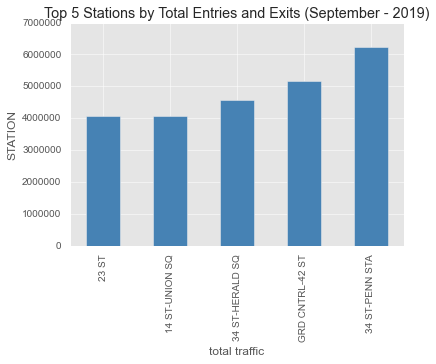

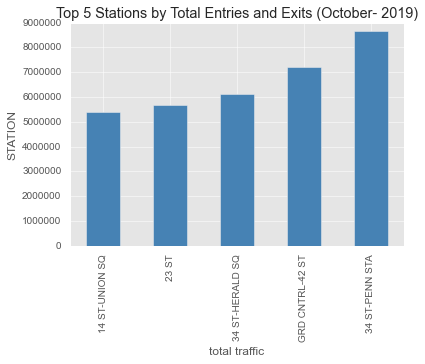

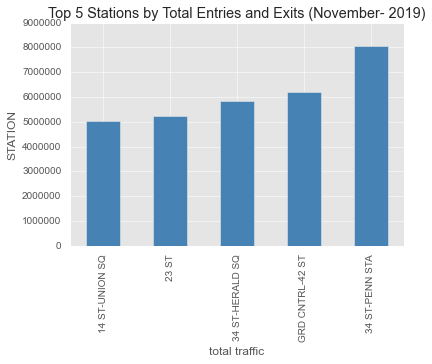

In [226]:
#Now we can plot the top five stations (since we have 378 stations, it would be good to minimise the plot axis size to plot only top 5)

top_5 =Sep_MTA.groupby(['STATION']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(5)
fig, ax = plt.subplots(sharex=True, sharey=True) 
top_5.sort_values(by = 'busy',ascending=True).plot(kind='bar', color ='steelblue',ax=ax)
ax.set(title='Top 5 Stations by Total Entries and Exits (September - 2019)', xlabel='total traffic', ylabel='STATION')
ax.legend().set_visible(False)

top_5 =oct_MTA.groupby(['STATION']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(5)
fig, ax = plt.subplots( sharex=True, sharey=True) 
top_5.sort_values(by = 'busy',ascending=True).plot(kind='bar', color ='steelblue',ax=ax)
ax.set(title='Top 5 Stations by Total Entries and Exits (October- 2019)', xlabel='total traffic', ylabel='STATION')
ax.legend().set_visible(False)


top_5 =Nov_MTA.groupby(['STATION']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(5)
fig, ax = plt.subplots( sharex=True, sharey=True)
top_5.sort_values(by = 'busy',ascending=True).plot(kind='bar', color ='steelblue',ax=ax)
ax.set(title='Top 5 Stations by Total Entries and Exits (November- 2019)', xlabel='total traffic', ylabel='STATION')
ax.legend().set_visible(False)

In [227]:
#top 5 stations for all three months combined
top5_all = mta_h1.groupby(['STATION']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(5)
top5_all.head()


,busy
STATION,
34 ST-PENN STA,23552841.0
GRD CNTRL-42 ST,19108972.0
34 ST-HERALD SQ,16933411.0
23 ST,15334577.0
14 ST-UNION SQ,14910870.0


In [229]:
# to identify the hour each traffic point 
mta_penn = mta_h1.loc[mta_h1['STATION'].isin(['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ'])]
#mta_penn = mta_h1[(mta_h1['STATION'] == '34 ST-PENN STA')] another way
mta_penn['hour'] = mta_penn['TIME'].apply(lambda x: int(x[:2]))
mta_penn.head()


<ipython-input-229-4e9cf3dcc517>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_penn['hour'] = mta_penn['TIME'].apply(lambda x: int(x[:2]))


,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,entries_diff,exits_diff,busy,hour
37390,A022,R022,01-00-00,34 ST-HERALD SQ,2019-09-07 00:00:00,09/07/2019,00:00:00,0.0,0.0,0.0,0
37391,A022,R022,01-00-00,34 ST-HERALD SQ,2019-09-07 04:00:00,09/07/2019,04:00:00,229.0,46.0,275.0,4
37392,A022,R022,01-00-00,34 ST-HERALD SQ,2019-09-07 08:00:00,09/07/2019,08:00:00,90.0,99.0,189.0,8
37393,A022,R022,01-00-00,34 ST-HERALD SQ,2019-09-07 12:00:00,09/07/2019,12:00:00,574.0,406.0,980.0,12
37394,A022,R022,01-00-00,34 ST-HERALD SQ,2019-09-07 16:00:00,09/07/2019,16:00:00,1239.0,550.0,1789.0,16


In [230]:
# find total traffic time by station first and then hours using group by
mta_time_busy = mta_penn.groupby(['STATION','hour']).agg({'busy': sum}).sort_values(by = ['STATION','hour'], ascending = True)

mta_time_busy.reset_index(inplace=True)
mta_time_busy.head(20)


,STATION,hour,busy
0,34 ST-HERALD SQ,0,1426751.0
1,34 ST-HERALD SQ,1,33.0
2,34 ST-HERALD SQ,3,176050.0
3,34 ST-HERALD SQ,4,229471.0
4,34 ST-HERALD SQ,7,163252.0
5,34 ST-HERALD SQ,8,786687.0
6,34 ST-HERALD SQ,11,1228053.0
7,34 ST-HERALD SQ,12,2701800.0
8,34 ST-HERALD SQ,15,1084051.0
9,34 ST-HERALD SQ,16,2406784.0


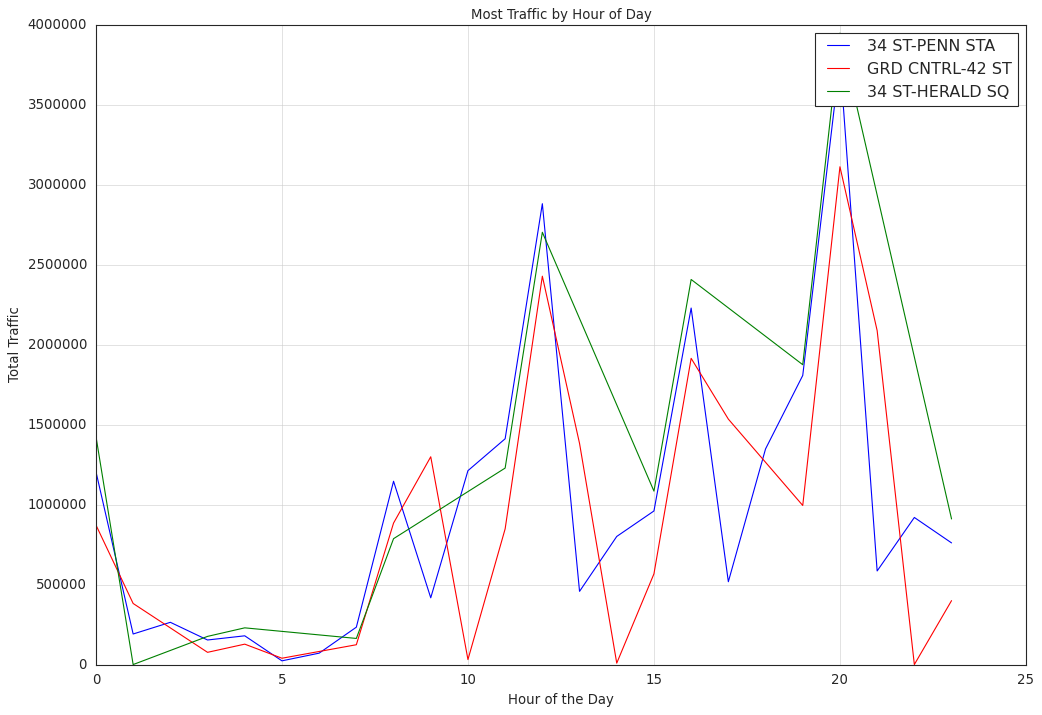

In [233]:
# plot 1 - to find the peaktime for each of the top station: 
#ax = plt.gca()
t1 ='34 ST-PENN STA'
t2 = 'GRD CNTRL-42 ST'
t3 = '34 ST-HERALD SQ'
t4 = '23 ST'
t5 = '14 ST-UNION SQ'
plt.figure(figsize=(15,10))

st1=mta_time_busy[(mta_time_busy['STATION'] == f'{t1}')]
st2=mta_time_busy[(mta_time_busy['STATION'] == f'{t2}')]
st3=mta_time_busy[(mta_time_busy['STATION'] == f'{t3}')]
st4=mta_time_busy[(mta_time_busy['STATION'] == f'{t4}')]
st5=mta_time_busy[(mta_time_busy['STATION'] == f'{t5}')]

plt.plot(st1['hour'],st1['busy'], color ='blue', label = f'{t1}')
plt.plot(st2['hour'],st2['busy'], color = 'r',label = f'{t2}')
plt.plot(st3['hour'],st3['busy'], color = 'g',label = f'{t3}')
#plt.plot(st4['hour'],st4['busy'], color = 'black',label = f'{t4}')
#plt.plot(st5['hour'],st5['busy'], color = 'brown',label = f'{t5}')

plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Total Traffic')
plt.grid(True)
plt.title('Most Traffic by Hour of Day', size = 12) 
plt.style.use('classic')
plt.show()
#x = mta_time_busy['hour']
#y = mta_time_busy['busy'] 
#plt.yticks(np.arange(0,24,1))
#plt.subplot
#plt.scatter(x,y)

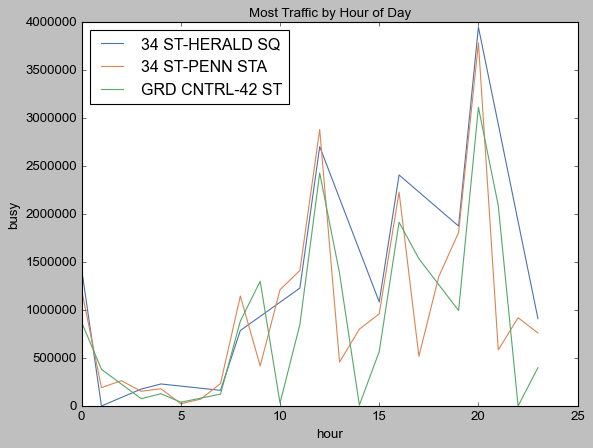

In [234]:
#plotting the same above using seaborn (for top three)
#plt.figure(figsize=(15,10))
sns.lineplot(data=mta_time_busy, x='hour',y='busy', hue = 'STATION', palette = 'deep', legend ='full')
plt.title('Most Traffic by Hour of Day', size = 12) 

plt.legend(loc='upper left')
sns.set_style("white")

In [235]:
#interested to observe how does the traffic change accross the week (daily)
mta_sorted['day_of_week'] = mta_sorted['DATE_TIME'].apply(lambda x : x.weekday())
mta_sorted.head()

<ipython-input-235-986912f852d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_sorted['day_of_week'] = mta_sorted['DATE_TIME'].apply(lambda x : x.weekday())


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,entries_diff,exits_diff,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,00:00:00,REGULAR,7190495,2435566,2019-09-07 00:00:00,0.0,0.0,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,04:00:00,REGULAR,7190516,2435574,2019-09-07 04:00:00,21.0,8.0,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,08:00:00,REGULAR,7190538,2435603,2019-09-07 08:00:00,22.0,29.0,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,12:00:00,REGULAR,7190676,2435676,2019-09-07 12:00:00,138.0,73.0,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/07/2019,16:00:00,REGULAR,7190931,2435725,2019-09-07 16:00:00,255.0,49.0,5


In [238]:
wkday_dict = {'0':'Mon',
             '1':'Tues',
             '2':'Weds',
             '3':'Thurs',
             '4':'Fri',
             '5':'Sat',
             '6':'Sun'}
day_of_week = mta_sorted['day_of_week'].map(lambda x : str(x)).map(wkday_dict)

In [239]:

mta_h1['weekday'] = (mta_h1['DATE_TIME']).dt.day_name()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mta_h1['weekday'] = pd.Categorical(mta_h1['weekday'], categories=weekdays, ordered = True)
mta_h1.head()

<ipython-input-239-89863e343fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_h1['weekday'] = (mta_h1['DATE_TIME']).dt.day_name()
<ipython-input-239-89863e343fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_h1['weekday'] = pd.Categorical(mta_h1['weekday'], categories=weekdays, ordered = True)


,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,entries_diff,exits_diff,busy,weekday
0,A002,R051,02-00-00,59 ST,2019-09-07 00:00:00,09/07/2019,00:00:00,0.0,0.0,0.0,Saturday
1,A002,R051,02-00-00,59 ST,2019-09-07 04:00:00,09/07/2019,04:00:00,21.0,8.0,29.0,Saturday
2,A002,R051,02-00-00,59 ST,2019-09-07 08:00:00,09/07/2019,08:00:00,22.0,29.0,51.0,Saturday
3,A002,R051,02-00-00,59 ST,2019-09-07 12:00:00,09/07/2019,12:00:00,138.0,73.0,211.0,Saturday
4,A002,R051,02-00-00,59 ST,2019-09-07 16:00:00,09/07/2019,16:00:00,255.0,49.0,304.0,Saturday


In [240]:
weekday_ave = mta_h1[['entries_diff', 'exits_diff', 'busy', 'weekday']].groupby('weekday').mean().reset_index().sort_values(by = 'weekday')

In [241]:
weekday_ave.head(7)

,weekday,entries_diff,exits_diff,busy
0,Monday,191.621827,151.146238,342.768065
1,Tuesday,206.007985,162.219208,368.227194
2,Wednesday,207.609090,163.796946,371.406036
3,Thursday,203.036089,159.878647,362.914736
4,Friday,203.311429,161.399617,364.711046
5,Saturday,117.614814,99.454087,217.068901
6,Sunday,93.248252,80.268409,173.516661


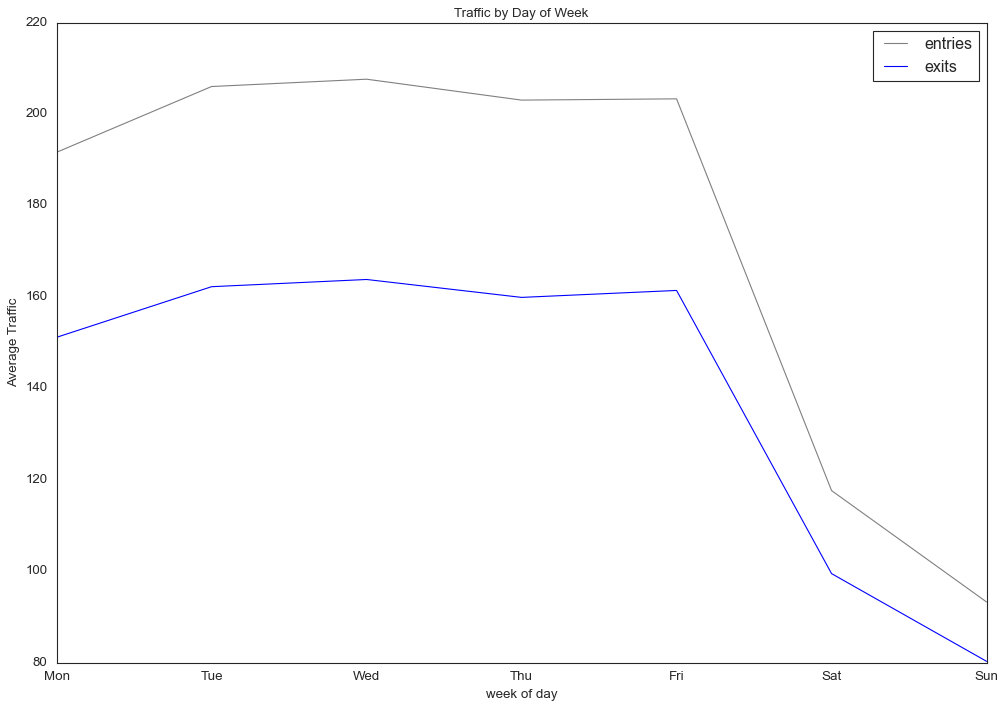

In [242]:
#plotting the results:

plt.figure(figsize=(15,10))
plt.plot(weekday_ave['weekday'],weekday_ave['entries_diff'], color='gray', label = 'entries')
plt.plot(weekday_ave['weekday'],weekday_ave['exits_diff'], color='blue', label = 'exits')
plt.xticks((0,1,2,3,4,5,6),('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('week of day')
plt.ylabel('Average Traffic')
plt.legend()
plt.grid(False)
plt.title('Traffic by Day of Week', size = 12) 
plt.show()

In [243]:
## Sql query:
from sqlalchemy import create_engine
import pandas as pd

In [244]:
engine =create_engine('sqlite://',echo=False)

In [245]:
mta_h1.to_sql("mtaps", con=engine)

In [246]:
x=pd.read_sql('SELECT * FROM mtaps limit 10;', engine )
x

,index,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,entries_diff,exits_diff,busy,weekday
0,0,A002,R051,02-00-00,59 ST,2019-09-07 00:00:00.000000,09/07/2019,00:00:00,0.0,0.0,0.0,Saturday
1,1,A002,R051,02-00-00,59 ST,2019-09-07 04:00:00.000000,09/07/2019,04:00:00,21.0,8.0,29.0,Saturday
2,2,A002,R051,02-00-00,59 ST,2019-09-07 08:00:00.000000,09/07/2019,08:00:00,22.0,29.0,51.0,Saturday
3,3,A002,R051,02-00-00,59 ST,2019-09-07 12:00:00.000000,09/07/2019,12:00:00,138.0,73.0,211.0,Saturday
4,4,A002,R051,02-00-00,59 ST,2019-09-07 16:00:00.000000,09/07/2019,16:00:00,255.0,49.0,304.0,Saturday
5,5,A002,R051,02-00-00,59 ST,2019-09-07 20:00:00.000000,09/07/2019,20:00:00,330.0,44.0,374.0,Saturday
6,6,A002,R051,02-00-00,59 ST,2019-09-08 00:00:00.000000,09/08/2019,00:00:00,157.0,21.0,178.0,Sunday
7,7,A002,R051,02-00-00,59 ST,2019-09-08 04:00:00.000000,09/08/2019,04:00:00,14.0,5.0,19.0,Sunday
8,8,A002,R051,02-00-00,59 ST,2019-09-08 08:00:00.000000,09/08/2019,08:00:00,9.0,16.0,25.0,Sunday
9,9,A002,R051,02-00-00,59 ST,2019-09-08 12:00:00.000000,09/08/2019,12:00:00,104.0,47.0,151.0,Sunday


In [248]:
#find the total traffic by station, top five 
y=pd.read_sql('SELECT STATION, sum(busy) AS "Total Traffic" FROM mtaps group by STATION  order by "Total Traffic" DESC limit 5;', engine)
y




,STATION,Total Traffic
0,34 ST-PENN STA,23552841.0
1,GRD CNTRL-42 ST,19108972.0
2,34 ST-HERALD SQ,16933411.0
3,23 ST,15334577.0
4,14 ST-UNION SQ,14910870.0


In [249]:
#count the number of SCP for each station
z=pd.read_sql('SELECT STATION, count(SCP) AS "Number of SCP" FROM mtaps group by STATION  order by "Number SCP" DESC limit 5;', engine)
z

,STATION,Number of SCP
0,ZEREGA AV,3018
1,YORK ST,1512
2,WTC-CORTLANDT,17616
3,WORLD TRADE CTR,9088
4,WOODLAWN,2519


In [250]:
#find the average traffic by weekday for each station 
z1=pd.read_sql('SELECT STATION, weekday, avg(busy) AS "Average_Traffic" FROM mtaps group by STATION, weekday  order by 1 DESC limit 20;', engine)
z1

,STATION,weekday,Average_Traffic
0,ZEREGA AV,Friday,148.886574
1,ZEREGA AV,Monday,142.689815
2,ZEREGA AV,Saturday,67.819249
3,ZEREGA AV,Sunday,53.671296
4,ZEREGA AV,Thursday,149.990741
5,ZEREGA AV,Tuesday,155.844907
6,ZEREGA AV,Wednesday,156.793981
7,YORK ST,Friday,1097.837963
8,YORK ST,Monday,1050.532407
9,YORK ST,Saturday,739.453704


In [251]:
#using subquery, finding top average for each station and corresponding date 
z2=pd.read_sql('SELECT STATION, weekday, max(Average_Traffic) from (SELECT STATION, weekday, avg(busy) AS "Average_Traffic" FROM mtaps group by STATION, weekday  order by 1,3 DESC) group by 1 order by 3 DESC limit 5;', engine)
z2

,STATION,weekday,max(Average_Traffic)
0,YORK ST,Friday,1097.837963
1,MYRTLE AV,Wednesday,855.822300
2,14 ST-UNION SQ,Friday,833.355518
3,30 AV,Wednesday,815.692460
4,ASTORIA DITMARS,Tuesday,772.420593
